In [1]:
####################################################################
###    This is the PYTHON version of program 7.2 from page 242 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR epidemic in a metapopulationFor simplicity births#
### and deaths have been ignored, and we work with numbers of      #
### individuals.                                                   #
### Y[i][j] refers to infected individual who are currently in i   #
### but live in j..                                                #
####################################################################

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties as fmp

In [3]:
n=5
beta=1.0*np.ones(n);
gamma=0.3*np.ones(n);
N0=np.zeros(n*n);
X0=np.zeros(n*n);
for i in np.arange(0,n*n,n+1):
	N0[i]=1000.0
	X0[i]=800.0

Y0=np.zeros(n*n); Y0[0]=1.0;
ND=MaxTime=60.
TS=1.0

In [4]:
l=np.zeros((n,n));r=np.zeros((n,n))
for i in range(n):
	for j in range(n):
		if abs(i-j)==1: 
			l[i][j]=0.1
r=2*np.ones((n,n)); r=r-np.diag(np.diag(r));

INPUT0=np.hstack((X0,Y0,N0))
INPUT = np.zeros((3*n*n))
for i in range(n*n):
	INPUT[3*i]=INPUT0[i]
	INPUT[1+3*i]=INPUT0[n*n+i]
	INPUT[2+3*i]=INPUT0[2*n*n+i]


In [5]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3*n*n))
	V = INP   
	sumY=np.zeros(n)
	sumN=np.zeros(n)
	
	## Calculate number currently in Subpopulation i
	for i in range(n):
		sumY[i]=0.0;sumN[i]=0.0
		for j in range(n):
			k=3*(j+i*n);
			sumN[i]+=V[2+k];
			sumY[i]+=V[1+k];	
			
	## Set all rates to zeros
	for i in range(n):
		for j in range(n):
			k=3*(j+i*n);
			Y[k]=0; Y[1+k]=0; Y[2+k]=0
	
	for i in range(n):
		for j in range(n):		
			## Calculate the rates
			k = 3 * (j+i*n) 
			K = 3 * (i+j*n)
			h = 3 * (i+i*n)
			H = 3 * (j+j*n)
			
			Y[k] -= (beta[i]*V[k]*(sumY[i]/sumN[i]))
			Y[k+1] += (beta[i]*V[k]*(sumY[i]/sumN[i]))
			Y[k+1] -= (gamma[i]*V[k+1])
			
			## Movement
			Y[h] += r[j][i]*V[K]
			Y[h] -= l[j][i]*V[h]
			
			Y[h+1] += r[j][i]*V[K+1]
			Y[h+1] -= l[j][i]*V[h+1]
			
			Y[h+2] += r[j][i]*V[K+2]
			Y[h+2] -= l[j][i]*V[h+2]
			
			Y[k] += l[i][j]*V[H]
			Y[k] -= r[i][j]*V[k]
			
			Y[1+k] += l[i][j]*V[1+H]
			Y[1+k] -= r[i][j]*V[1+k]
			
			Y[2+k] += l[i][j]*V[2+H]
			Y[2+k] -= r[i][j]*V[2+k]
	return Y   # For odeint

In [6]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
t_course = spi.odeint(diff_eqs,INPUT,t_range)
tc = t_course


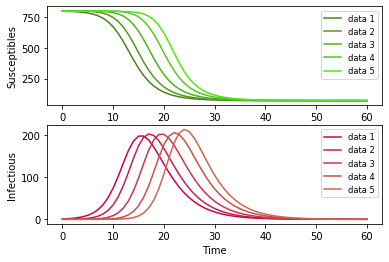

In [7]:
### Plotting
totalS=np.zeros((len(tc),5))
totalI=np.zeros((len(tc),5))

for i in range(n):
	for j in range(n):
		k=3*(j+i*n);
		totalS[:,i]+=tc[:,k]
		totalI[:,i]+=tc[:,k+1]


#print len(totalS)
pl.subplot(211)
for i in range(5):
	pl.plot(t_range,totalS[:,i], label=('data %s' %(i+1)), color=(0.3,i/10.+0.5,0.1))
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.legend(loc=1,prop = fmp(size='smaller'))
pl.subplot(212)
for i in range(5):
	pl.plot(t_range,totalI[:,i], label=('data %s' %(i+1)), color=(0.8,i/10.+0.,0.3))
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.legend(loc=1,prop = fmp(size='smaller'))

pl.show()